In [54]:
pip install lightgbm

In [55]:
pip install catboost

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [57]:
train = pd.read_csv("/content/drive/MyDrive/House Price Prediction (1)/Housing_dataset_train.csv")
test = pd.read_csv("/content/drive/MyDrive/House Price Prediction (1)/Housing_dataset_test.csv")
sample = pd.read_csv("/content/drive/MyDrive/House Price Prediction (1)/Sample_submission.csv")

In [58]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [59]:
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [60]:
sample.head()

,ID
0,845
1,1924
2,10718
3,12076
4,12254


In [61]:
print("Train dataset length: ", len(train))
print("Test dataset length: ", len(test))
print("sample dataset length: ", len(sample))

Train dataset length:  14000
Test dataset length:  6000
sample dataset length:  6000


In [62]:
print("Train dataset shape: ", train.shape)
print("Test dataset shape: ", test.shape)
print("sample dataset shape: ", sample.shape)

Train dataset shape:  (14000, 7)
Test dataset shape:  (6000, 6)
sample dataset shape:  (6000, 1)


In [63]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [64]:
test.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

In [65]:
sample.isnull().sum()

ID    0
dtype: int64

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB


In [68]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      6000 non-null   int64
dtypes: int64(1)
memory usage: 47.0 KB


In [69]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [70]:
test.describe()

,ID,bedroom,bathroom,parking_space
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,4818.699167,4.329833,3.105667,3.132333
std,3832.336902,2.454733,2.033189,1.604551
min,2.000000,1.000000,1.000000,1.000000
25%,1647.000000,2.000000,1.000000,2.000000
50%,3433.000000,4.000000,2.000000,3.000000
75%,7970.000000,6.000000,5.000000,4.000000
max,12995.000000,9.000000,7.000000,6.000000


# Train Data

In [71]:
train.groupby('loc')['loc'].agg('count')

loc
Abia           312
Adamawa        341
Akwa Ibom      329
Anambra        363
Bauchi         342
Bayelsa        340
Benue          355
Borno          351
Cross River    349
Delta          325
Ebonyi         346
Edo            302
Ekiti          336
Enugu          324
Gombe          343
Imo            348
Jigawa         337
Kaduna         370
Kano           351
Katsina        345
Kebbi          346
Kogi           321
Kwara          333
Lagos          328
Nasarawa       349
Niger          330
Ogun           345
Ondo           344
Osun           338
Oyo            341
Plateau        338
Rivers         323
Sokoto         326
Taraba         315
Yobe           353
Zamfara        348
Name: loc, dtype: int64

In [72]:
train.groupby('title')['title'].agg('count')

title
Apartment               1331
Bungalow                1293
Cottage                  450
Detached duplex         1312
Flat                    1372
Mansion                 1322
Penthouse               1306
Semi-detached duplex    1299
Terrace duplex          1266
Townhouse               1327
Name: title, dtype: int64

# Test data

In [73]:
test.groupby('loc')['loc'].agg('count')

loc
Abia           175
Adamawa        175
Akwa Ibom      155
Anambra        180
Bauchi         175
Bayelsa        159
Benue          188
Borno          188
Cross River    163
Delta          169
Ebonyi         147
Edo            165
Ekiti          170
Enugu          159
Gombe          158
Imo            152
Jigawa         155
Kaduna         166
Kano           170
Katsina        175
Kebbi          170
Kogi           177
Kwara          144
Lagos          174
Nasarawa       172
Niger          159
Ogun           185
Ondo           167
Osun           168
Oyo            183
Plateau        159
Rivers         144
Sokoto         163
Taraba         167
Yobe           159
Zamfara        165
Name: loc, dtype: int64

In [74]:
test.groupby('loc')['loc'].agg('count')

loc
Abia           175
Adamawa        175
Akwa Ibom      155
Anambra        180
Bauchi         175
Bayelsa        159
Benue          188
Borno          188
Cross River    163
Delta          169
Ebonyi         147
Edo            165
Ekiti          170
Enugu          159
Gombe          158
Imo            152
Jigawa         155
Kaduna         166
Kano           170
Katsina        175
Kebbi          170
Kogi           177
Kwara          144
Lagos          174
Nasarawa       172
Niger          159
Ogun           185
Ondo           167
Osun           168
Oyo            183
Plateau        159
Rivers         144
Sokoto         163
Taraba         167
Yobe           159
Zamfara        165
Name: loc, dtype: int64

<Axes: >

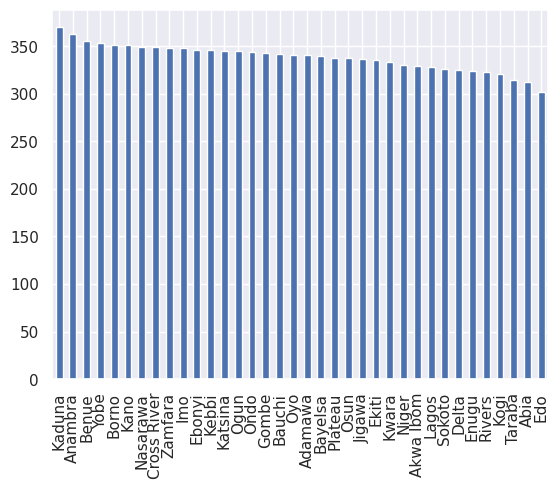

In [75]:
train['loc'].value_counts().plot(kind='bar')

<Axes: >

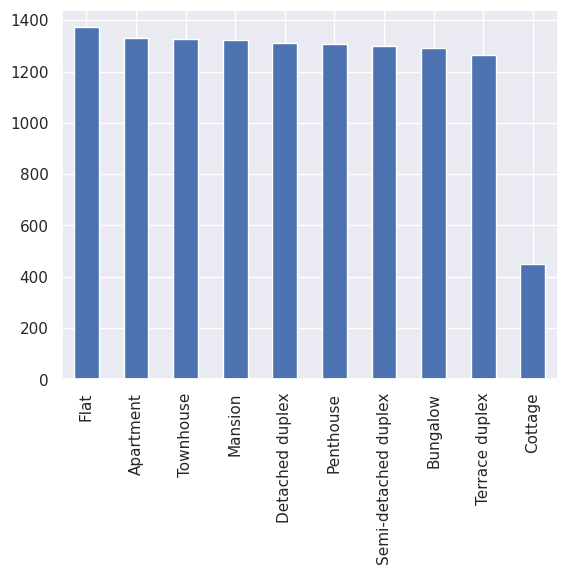

In [76]:
train['title'].value_counts().plot(kind='bar')

<Axes: >

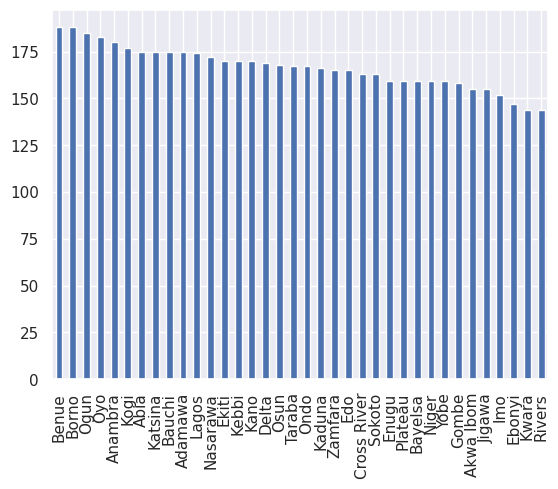

In [77]:
test['loc'].value_counts().plot(kind='bar')

<Axes: >

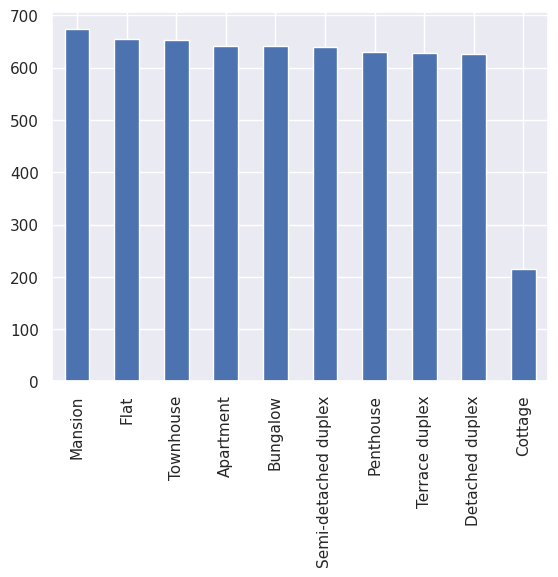

In [78]:
test['title'].value_counts().plot(kind='bar')

In [79]:
train.dropna(how='all')

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [80]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [81]:
len(train)

14000

In [82]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [83]:
train['title'].value_counts()

Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64

In [84]:
data = pd.concat([train, test], axis=0, ignore_index=True)
data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [85]:
len(data)

20000

In [86]:
data.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price            6000
dtype: int64

In [87]:
data.dropna(inplace=True)

In [88]:
title = {
    'Semi-detached duplex' : 1, 'Apartment': 2, 'Detached duplex':3,
    'Terrace duplex': 4, 'Mansion':5, 'Bungalow':6, 'Penthouse':7, 'Townhouse':8,
       'Flat': 9, 'Cottage': 10
}


data.title = data.title.map(title)

In [89]:
data.head(3)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,1,2.0,2.0,1.0,1149999.565
3,2224,Anambra,3,5.0,2.0,4.0,2410306.756
7,3003,Katsina,7,3.0,3.0,5.0,2043107.592


In [90]:
title = {
    'Semi-detached duplex' : 1, 'Apartment': 2, 'Detached duplex':3,
    'Terrace duplex': 4, 'Mansion':5, 'Bungalow':6, 'Penthouse':7, 'Townhouse':8,
       'Flat': 9, 'Cottage': 10
}


train.title = train.title.map(title)


In [91]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,1.0,2.0,2.0,1.0,1149999.565
1,2748,Ondo,2.0,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,3.0,5.0,2.0,4.0,2410306.756
4,10300,Kogi,4.0,NaN,5.0,6.0,2600700.898


In [92]:
title = {
    'Semi-detached duplex' : 1, 'Apartment': 2, 'Detached duplex':3,
    'Terrace duplex': 4, 'Mansion':5, 'Bungalow':6, 'Penthouse':7, 'Townhouse':8,
       'Flat': 9, 'Cottage': 10
}


test.title = test.title.map(title)


In [93]:
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,7,4,1,2
1,1924,Adamawa,2,2,2,4
2,10718,Adamawa,6,2,7,2
3,12076,Lagos,5,9,5,2
4,12254,Gombe,1,5,6,1


In [94]:
# Calculate the frequency of each category in the 'loc' column
category_frequencies = data['loc'].value_counts(normalize=True)

# Create a dictionary to map each category to its corresponding frequency
loc_frequency_mapping = category_frequencies.to_dict()

# Map the 'loc' column to its corresponding frequency values
data['loc'] = data['loc'].map(loc_frequency_mapping)

# Print the updated dataframe
data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,0.026191,1,2.0,2.0,1.0,1149999.565
3,2224,0.029179,3,5.0,2.0,4.0,2410306.756
7,3003,0.026191,7,3.0,3.0,5.0,2043107.592
10,12573,0.027070,6,1.0,2.0,6.0,1330213.036
11,2624,0.027949,2,3.0,4.0,2.0,1891772.069


In [95]:
# Calculate the frequency of each category in the 'loc' column
category_frequencies = train['loc'].value_counts(normalize=True)

# Create a dictionary to map each category to its corresponding frequency
loc_frequency_mapping = category_frequencies.to_dict()

# Map the 'loc' column to its corresponding frequency values
train['loc'] = train['loc'].map(loc_frequency_mapping)

# Print the updated dataframe
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,0.028309,1.0,2.0,2.0,1.0,1149999.565
1,2748,0.028227,2.0,NaN,2.0,4.0,1672416.689
2,9261,0.027570,NaN,7.0,5.0,NaN,3364799.814
3,2224,0.029786,3.0,5.0,2.0,4.0,2410306.756
4,10300,0.026340,4.0,NaN,5.0,6.0,2600700.898


In [96]:
# Calculate the frequency of each category in the 'loc' column
category_frequencies = test['loc'].value_counts(normalize=True)

# Create a dictionary to map each category to its corresponding frequency
loc_frequency_mapping = category_frequencies.to_dict()

# Map the 'loc' column to its corresponding frequency values
test['loc'] = test['loc'].map(loc_frequency_mapping)

# Print the updated dataframe
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,0.028333,7,4,1,2
1,1924,0.029167,2,2,2,4
2,10718,0.029167,6,2,7,2
3,12076,0.029000,5,9,5,2
4,12254,0.026333,1,5,6,1


In [97]:
data1 = data.drop(['ID','price'], axis='columns')
data1.head()

,loc,title,bedroom,bathroom,parking_space
0,0.026191,1,2.0,2.0,1.0
3,0.029179,3,5.0,2.0,4.0
7,0.026191,7,3.0,3.0,5.0
10,0.027070,6,1.0,2.0,6.0
11,0.027949,2,3.0,4.0,2.0


In [98]:
len(data1)

5689

In [99]:
#loc_media = data1['loc'].median()
#title_median = data1['title'].median()
#bedroom_median = data1['bedroom'].median()
#bathroom_median = data1['bathroom'].median()
#parking_space_median = data1['parking_space'].median()

In [100]:
#data1['loc'].fillna(loc_media, inplace = True)
#data1['title'].fillna(title_median, inplace = True)
#data1['bedroom'].fillna(bedroom_median, inplace = True)
#data1['bathroom'].fillna(bathroom_median, inplace = True)
#data1['parking_space'].fillna(parking_space_median, inplace = True)

In [101]:
X = data1
y = data.price

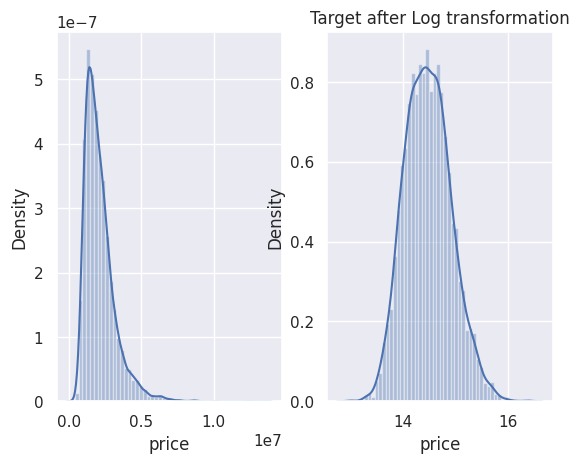

In [102]:
sns.set()
y_transformed = pd.Series(np.log1p(y))

fig, ax = plt.subplots(1, 2)
sns.distplot(y, ax=ax[0])
plt.title("Target after Log transformation")
# ax[0].axvline(y_transformed)
sns.distplot(y_transformed, ax=ax[1])
plt.show()

In [103]:
y.head()

0     1149999.565
3     2410306.756
7     2043107.592
10    1330213.036
11    1891772.069
Name: price, dtype: float64

In [104]:
y.isnull().sum()

0

In [105]:
X.head()

,loc,title,bedroom,bathroom,parking_space
0,0.026191,1,2.0,2.0,1.0
3,0.029179,3,5.0,2.0,4.0
7,0.026191,7,3.0,3.0,5.0
10,0.027070,6,1.0,2.0,6.0
11,0.027949,2,3.0,4.0,2.0


In [106]:
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,0.028333,7,4,1,2
1,1924,0.029167,2,2,2,4
2,10718,0.029167,6,2,7,2
3,12076,0.029000,5,9,5,2
4,12254,0.026333,1,5,6,1


In [107]:
t = test.drop(['ID'], axis='columns')

In [108]:
test = t

In [109]:
test.head()

,loc,title,bedroom,bathroom,parking_space
0,0.028333,7,4,1,2
1,0.029167,2,2,2,4
2,0.029167,6,2,7,2
3,0.029000,5,9,5,2
4,0.026333,1,5,6,1


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
lgb_preds = lgb.predict(X_test)

print(f'mse = {mean_squared_error(y_test, lgb_preds, squared=False)}')

mse = 545358.7527906512


In [112]:
fold_pred=[]
oof_pred = []

params = {
    'n_estimators': 500,
    'colsample_bytree': 0.86,
 'learning_rate': 0.032,
 'max_depth': 5,
 'subsample': 0.85}


fold = KFold(n_splits=7, shuffle=True)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = LGBMRegressor(**params, objective = "rmse")
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100, verbose = False)#erly100

    preds= model.predict(X_test)
    print("err: ",(mean_squared_error(y_test,np.expm1(preds), squared=False)))  #Reverse transformation
    oof_pred.append(mean_squared_error(y_test,np.expm1(preds),squared=False))
    p2 = model.predict(test[X.columns])
    fold_pred.append(np.expm1(p2))


print(np.mean(oof_pred))

err:  567719.0274925289
err:  537669.6315599584
err:  650255.923233662
err:  511301.19755972194
err:  576394.345598717
err:  472186.7654525056
err:  476614.4249997683
541734.4736995518


In [113]:
sample.head()

,ID
0,845
1,1924
2,10718
3,12076
4,12254


In [114]:
sample['price'] =  np.mean(fold_pred, axis = 0)

In [115]:
sample.head()

,ID,price
0,845,2.308076e+06
1,1924,1.274970e+06
2,10718,1.460705e+06
3,12076,5.503533e+06
4,12254,2.634324e+06


In [116]:
sample.to_csv('Baseline submission6.csv', index=False)